## **RSI**
**Rationale**
- The Relative Strength Index(RSI) leverages on the concept of mean reversion to identify overbought and oversold levels in a security.

**Aim**
- We will explore the profitability of selling at overbought levels and buying at oversold levels using the RSI indicator.
- We will also explore and understand the limitations of RSI.

**Limitations**
1. Operates at 1 hour intervals due to Yahoo Finance limitations.
- If it is a viable strategy, use API to convert to shorter time frames, such as 5 or 15 min intervals.

## **RSI Indicator**
**Understanding the RSI Indicator**

The RSI indicator identifies price extremes and shifts in momentum. The typical common thresholds for this indicator are:
- RSI reading > 70: Overbought level (SELL)
- RSI reading < 30: Oversold level (BUY)

*NOTE: This indicator is often used in conjunction with other technical indicators or strategies to increase its effectiveness.*


**Formula**

It is calculated by the following equation:

$$
RSI = 100 - \left( \frac{100}{1 + \frac{\text{Average Gain}}{\text{Average Loss}}} \right)
$$


**Gather Historical Data for the stock of interest**
- For this notebook, we will analyse the stock: NVIDIA (Ticker Symbol: NVDA)

In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

from datetime import datetime

In [78]:
def get_historical_data(ticker):
    data = pd.DataFrame()
    stock_data = yf.download(
        ticker,
        start=datetime(2024, 1, 1),
        end=datetime(2024, 10, 1),
        interval='1h',
        prepost=True
    )

    data_ticker = stock_data[['Open', 'High', 'Low', 'Close']]

    data_ticker.columns = [f"{col}" for col in data_ticker.columns]

    data = pd.concat([data, data_ticker], axis=1)
    return data

In [79]:
df = get_historical_data('NVDA')
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000


**Calculate RSI using Pandas TA**

In [80]:
period = 14  # Standard RSI period
df['RSI'] = ta.rsi(df['Close'], timeperiod=period)
df.tail(10)

,Open,High,Low,Close,RSI
Datetime,,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801,51.574486
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996,50.022023
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700,46.448102
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001,43.047463
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999,47.113518
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998,55.015100
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000,53.246759
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000,52.371578
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000,52.491710


**Visualize Stock Price and RSI Indicator**

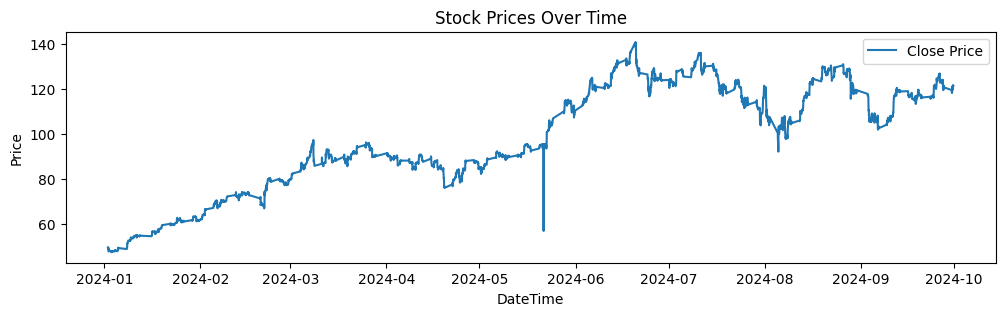

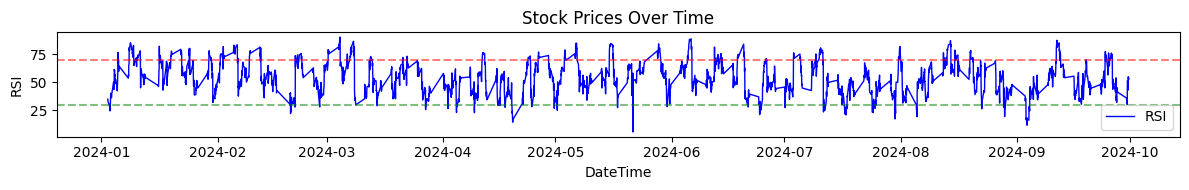

In [81]:
# Plot Close prices
plt.figure(figsize=(12, 3))
plt.plot(df.index, df['Close'], label='Close Price', alpha=1)
plt.title('Stock Prices Over Time')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()

# Plot RSI
plt.figure(figsize=(12,2))
plt.plot(df.index, df['RSI'], label='RSI', color='blue', linewidth=1)
plt.axhline(70, linestyle='--', alpha=0.5, color='red')   # Overbought level
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold level
plt.title('Stock Prices Over Time')
plt.xlabel('DateTime')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

Now that we have identified the key overbought and oversold levels, we can use them as our entry and exit points for our strategy.

**Implement Strategy**

The strategy will be as such:
- Entry Point when RSI crosses 30.
- Exit Point when RSI crosses 70.
- Run back-test to test this strategy.

In [82]:
def calculate_rsi_strategy(df):

  df_close_prices = df['Close'].values
  df_rsi = df['RSI'].values

  curr_holdings = []
  wins, losses = 0, 0
  net_revenue = 0
  signal = 0 # signal ensures that we do not buy into a stock more than once for a crossover.
  max_holdings = 5 # this ensures we do not have too many holdings at any one point in time

  for i in range(len(df)):
    if df_rsi[i] <= 30 and signal >= 0 and max_holdings > len(curr_holdings):
        curr_price = round(df_close_prices[i], 2)
        curr_holdings.append(curr_price)
        signal = -1
    elif df_rsi[i] >= 70 and signal <= 0:
        for holding in curr_holdings:
            profit = df_close_prices[i] - holding
            net_revenue += profit
            if profit >= 0:
                wins += 1
            else:
                losses += 1
        curr_holdings = []
        signal = 1
    else:
       signal = 0
  return [net_revenue, wins, losses, len(curr_holdings)]

In [83]:
result = calculate_rsi_strategy(df)

print(f" Net Revenue: ${round(result[0],2)}, Wins: {result[1]}, Losses: {result[2]}, Open Positions: {result[3]}")

 Net Revenue: $163.07, Wins: 34, Losses: 14, Open Positions: 0
